In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

In [55]:
df=pd.read_csv('autos.csv', index_col=0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body=style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556


## Missing Data

**Find all columns that have NaN values**

In [56]:
df.columns[df.isna().any()]

Index(['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm'],
      dtype='object')

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

**Calculate the mean value for the "normalized-losses" column**

In [57]:
norm_loss_avg = df["normalized-losses"].astype("float").mean(axis=0) 
print("Average of normalized-losses:", norm_loss_avg)

Average of normalized-losses: 122.0


**Replace "NaN" with mean value in "normalized-losses" column**

In [58]:
df['normalized-losses'].replace(np.NaN, norm_loss_avg, inplace=True)
df[['normalized-losses']]

,normalized-losses
0,122.0
1,122.0
2,122.0
3,164.0
4,164.0
...,...
200,95.0
201,95.0
202,95.0
203,95.0


**Calculate the mean value for the "bore" column and replace "NaN with mean value**

In [59]:
bore_avg=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", bore_avg)

Average of bore: 3.3307106598984775


In [79]:
df['bore'].replace(np.nan, bore_avg, inplace=True)

**replace NaN in "stroke" column with the mean value.**

In [61]:
stroke_avg=df['stroke'].astype('float').mean(axis=0)
print("Average of stroke:", stroke_avg)

Average of stroke: 3.2569035532994857


In [78]:
df['stroke'].replace(np.nan, stroke_avg, inplace=True)

**replace NaN in "horsepower" column with the mean value.**

In [66]:
hp_avg=df['horsepower'].astype('float').mean(axis=0)
print("Average of horsepower:", hp_avg)

Average of horsepower: 103.39698492462311


In [77]:
df['horsepower'].replace(np.nan, hp_avg, inplace=True)

**replace NaN in "peak-rpm" column with the mean value.**

In [68]:
peak_rpm_avg=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", peak_rpm_avg)

Average peak rpm: 5117.587939698493


In [76]:
df['peak-rpm'].replace(np.nan, peak_rpm_avg, inplace=True)

**Replace "NaN" with the frequency value in the "num-of-doors" column**

In [72]:
#What values are present in the num-of-doors column?
df['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

There are either four door or two door vehicles, with four doors being more common.
Lets confirm this with the .idxmax()function!

In [74]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [75]:
#Replace the NaN values with 4
df["num-of-doors"].replace(np.nan, "four", inplace=True)

**Drop all rows that do not have price data**

In [80]:
#Drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because rows were dropped
df.reset_index(drop=True, inplace=True)

## Data Formatting

In [82]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body=style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
city-L/100km         float64
dtype: object

Some of the columns are not the correct data types. **Change 'normalized-losses from float to int, 'price' from int to float.**

In [83]:
df[['normalized-losses']]=df[['normalized-losses']].astype('int')
df[['price']]=df[['price']].astype('float')
df[['normalized-losses', 'price']]

,normalized-losses,price
0,122,13495.0
1,122,16500.0
2,122,16500.0
3,164,13950.0
4,164,17450.0
...,...,...
196,95,16845.0
197,95,19045.0
198,95,21485.0
199,95,22470.0


## Data Standardization

<p><b>Standardization</b> is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example:</b>

<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>

In [84]:
df['highway-L/100km']=235/df['highway-mpg']
df[['highway-L/100km']]

,highway-L/100km
0,8.703704
1,8.703704
2,9.038462
3,7.833333
4,10.681818
...,...
196,8.392857
197,9.400000
198,10.217391
199,8.703704


## Data Normalization

<p>Normalization is the process of transforming values of several variables into a similar range.</p>

<p>Typical normalizations include scaling the variable so the variable average is 0 or 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Scale the columns "length", "width" and "height".</b>

In [89]:
#Replace the original value by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

df[['length', 'width', 'height']]

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
...,...,...,...
196,0.907256,0.956944,0.928094
197,0.907256,0.955556,0.928094
198,0.907256,0.956944,0.928094
199,0.907256,0.956944,0.928094


## Binning Data

<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In this dataset,<b> "horsepower" </b> is a real valued variable ranging from 48-288 with 59 unique values. Bin the data into high horsepower, medium horsepower, and little horsepower to simplify analysis. </p>

<p><b>Use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</b></p>


In [91]:
#First convert data from float to int
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'Horsepower Bins')

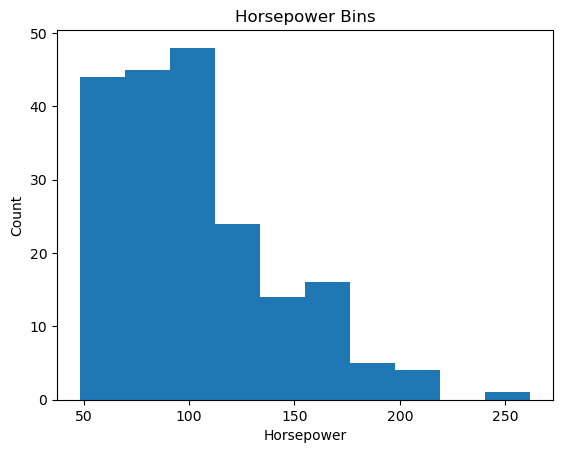

In [94]:
#Plot as histogram to see distribution

mpl.hist(df["horsepower"])

# set x/y labels and plot title
mpl.xlabel("Horsepower")
mpl.ylabel("Count")
mpl.title("Horsepower Bins")

In [98]:
#Create 3 bins of equal size for 'horsepower'
bins=np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [99]:
groups=['Low', 'Medium', 'High']

In [101]:
df['horsepower-binned']=pd.cut(df['horsepower'], bins, labels=groups, include_lowest=True)
df[['horsepower-binned']]

,horsepower-binned
0,Low
1,Low
2,Medium
3,Low
4,Low
...,...
196,Low
197,Medium
198,Medium
199,Low


<b>What are the number of vehicles in each bin?</b>

In [102]:
df['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'Horsepower Bins')

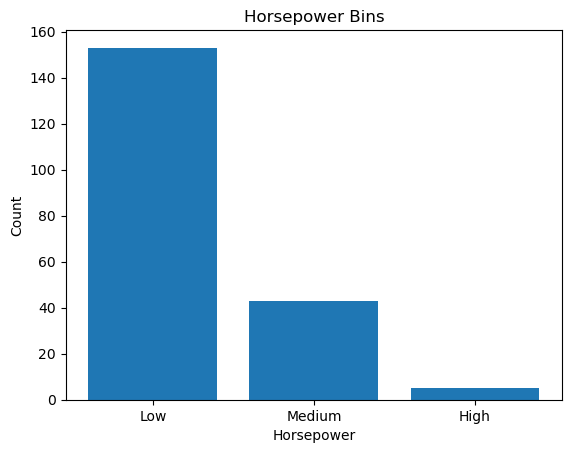

In [106]:
#Plot the distribution of each bin
mpl.bar(groups, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
mpl.xlabel("Horsepower")
mpl.ylabel("Count")
mpl.title("Horsepower Bins")

Now we can see that most of the dataset has horsepower on the lower end!

<b> Now lets visualize our bins! </b>

Text(0.5, 1.0, 'Horsepower Bins')

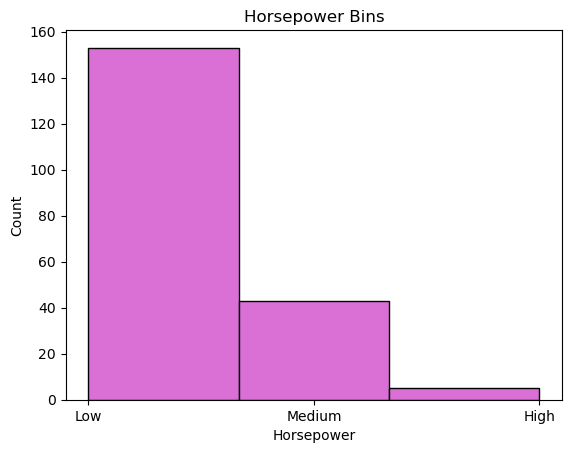

In [112]:
mpl.hist(df['horsepower-binned'], color='orchid', ec='black', bins=3)
mpl.xlabel("Horsepower")
mpl.ylabel("Count")
mpl.title("Horsepower Bins")

## Indicator (Dummy) Variables

<p>
    An <b>indicator</b> variable (dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>


<p>
    We use indicator variables so we can use categorical variables for <b>regression</b> analysis.

Convert categorical variables in 'fuel-type' and 'aspiration' to quantitative variables

In [113]:
df['fuel-type']=df['fuel-type'].apply(lambda x:0 if x=='gas' else 1)
df['fuel-type']

0      0
1      0
2      0
3      0
4      0
      ..
196    0
197    0
198    0
199    1
200    0
Name: fuel-type, Length: 201, dtype: int64

In [114]:
df['aspiration']=df['aspiration'].apply(lambda x:0 if x=='std' else 1)
df['aspiration']

0      0
1      0
2      0
3      0
4      0
      ..
196    0
197    1
198    0
199    1
200    1
Name: aspiration, Length: 201, dtype: int64

<center><h1><b> Resources </b></h1></center>

https://matplotlib.org/stable/tutorials/colors/colors.html

<p> <b> Skills Network Labs:</b> </p>
    Joseph Santarcangelo, Mahdi Noorian, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vasudevan